## Exploring TMDB Data

In [2]:
import glob
tmdb_files = sorted(glob.glob('Data/final_tmdb_data*.csv.gz'))
tmdb_files

['Data\\final_tmdb_data_2001.csv.gz', 'Data\\final_tmdb_data_2002.csv.gz']

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
tmdbDF = pd.concat([pd.read_csv(f) for f in tmdb_files])
tmdbDF

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/tJLV3BAlHOgscVOrA99Wnb2gAef.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.326,1245.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.000,3.0,NaN
3,tt0116916,0.0,/rFpHBidSlhjflmnLu7BZilyKeQR.jpg,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,73549.0,en,The Dark Mist,...,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Dark Mist,0.0,3.500,2.0,PG
4,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.400,132.0,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,tt6449044,0.0,/a9pkw8stijESGx1flSGPqcXLkHu.jpg,"{'id': 957260, 'name': 'The Conman Collection'...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,314105.0,cn,賭俠2002,...,0.0,97.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,NaN,The Conman 2002,0.0,4.300,3.0,NaN
1292,tt6694126,0.0,/sXjVpTZyDvwzPVZve3AmyCUBeHk.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,819174.0,fa,عروس خوش‌قدم,...,0.0,101.0,"[{'english_name': 'Persian', 'iso_639_1': 'fa'...",Released,NaN,The Lucky Bride,0.0,8.000,1.0,NaN
1293,tt8302928,0.0,NaN,NaN,0.0,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,866533.0,el,Movie Toons: Treasure Island,...,0.0,0.0,[],Released,NaN,Movie Toons: Treasure Island,0.0,0.000,0.0,NaN
1294,tt8474326,0.0,NaN,NaN,0.0,[],NaN,292027.0,en,Skin Eating Jungle Vampires,...,0.0,0.0,[],Released,NaN,Skin Eating Jungle Vampires,0.0,0.000,0.0,NaN


In [8]:
financials = tmdbDF[['budget', 'revenue']] > 0
financials.head()

,budget,revenue
0,False,False
1,True,True
2,False,False
3,False,False
4,True,True


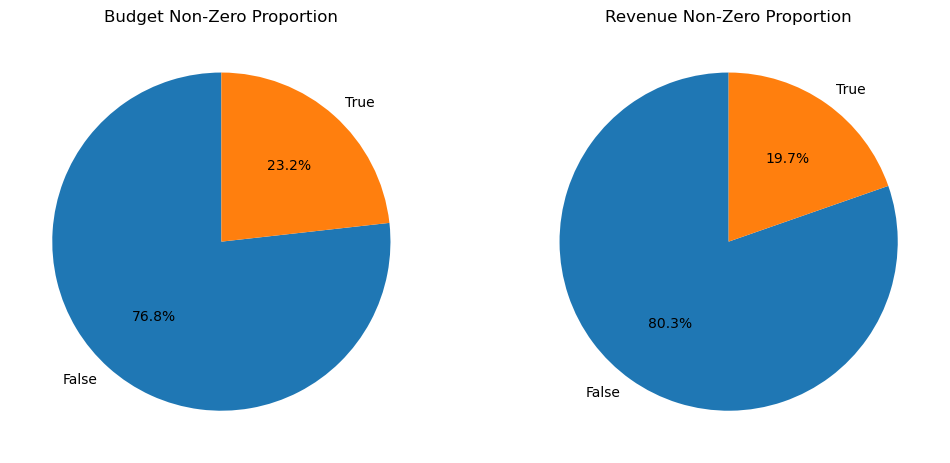

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].pie(financials['budget'].value_counts(), labels=financials['budget'].value_counts().index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Budget Non-Zero Proportion')

ax[1].pie(financials['revenue'].value_counts(), labels=financials['revenue'].value_counts().index, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Revenue Non-Zero Proportion')

plt.show()

In [10]:
financials.value_counts()

budget  revenue
False   False      1928
True    True        411
        False       206
False   True        111
dtype: int64

In [11]:
mask = (tmdbDF['budget'].isnull() | tmdbDF['budget'] == 0) & (tmdbDF['revenue'].isnull() | tmdbDF['revenue'] == 0)

In [12]:
finDF = tmdbDF[~mask]
finDF.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/tJLV3BAlHOgscVOrA99Wnb2gAef.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.326,1245.0,PG-13
4,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.400,132.0,PG-13
5,tt0118652,0.0,/mWxJEFRMvkG4UItYJkRDMgWQ08Y.jpg,NaN,1000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,17140.0,en,The Attic Expeditions,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,His search for peace of mind... will leave his...,The Attic Expeditions,0.0,5.200,32.0,R
6,tt0119004,0.0,/r7bxHKEzgrURm9qhEaAayIMG4Xi.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,37857.0,en,Don's Plum,...,6297.0,108.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Tonight's Special - Group Therapy,Don's Plum,0.0,5.300,74.0,NaN


<Axes: xlabel='count', ylabel='certification'>

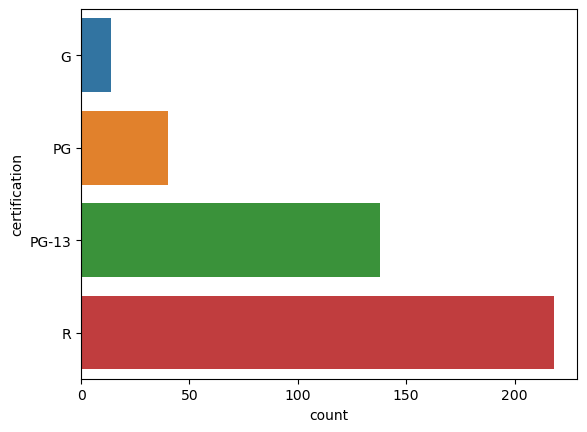

In [13]:
sns.countplot(finDF, y='certification', order=['G','PG','PG-13','R'])

In [14]:
finCertCount = finDF['certification'].value_counts()
finCertCount

R        218
PG-13    138
PG        40
NR        25
G         14
Name: certification, dtype: int64

In [15]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
avgRev = finDF.groupby('certification')['revenue'].mean()
avgRev

certification
G       115996896.64
NR        2308279.88
PG      154399681.10
PG-13    97001751.75
R        28482756.42
Name: revenue, dtype: float64

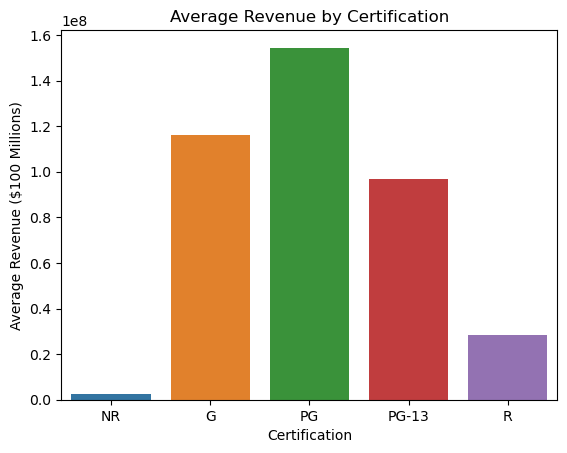

In [16]:
avgRevDF = pd.DataFrame(avgRev)
avgRevDF = avgRevDF.reset_index()

sns.barplot(avgRevDF, x='certification', y='revenue', order=['NR', 'G', 'PG', 'PG-13', 'R'])

plt.xlabel('Certification')
plt.ylabel('Average Revenue ($100 Millions)')
plt.title('Average Revenue by Certification')

plt.show()

In [17]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
avgBud = finDF.groupby('certification')['budget'].mean()
avgBud

certification
G       37571428.57
NR       1089080.04
PG      43998055.75
PG-13   39641585.77
R       18283580.39
Name: budget, dtype: float64

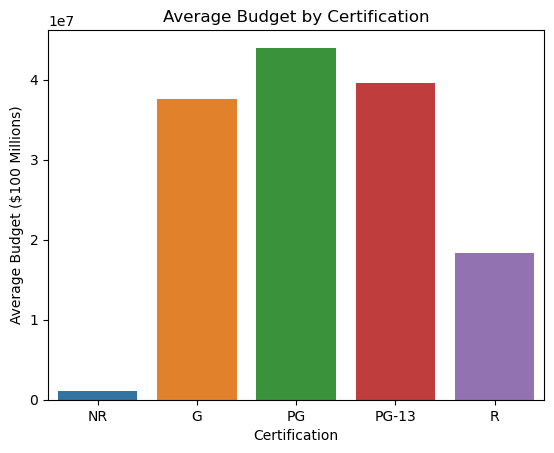

In [18]:
avgBudDF = pd.DataFrame(avgBud)
avgBudDF = avgBudDF.reset_index()

sns.barplot(avgBudDF, x='certification', y='budget', order=['NR', 'G', 'PG', 'PG-13', 'R'])

plt.xlabel('Certification')
plt.ylabel('Average Budget ($100 Millions)')
plt.title('Average Budget by Certification')

plt.show()

In [20]:
tmdbDF.to_csv("Data/tmdbDF_combined_data.csv.gz", index=False, compression='gzip')